[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TomGeorge1234/RatInABox/blob/dev/demos/paper_figures.ipynb)

# RatInABox: Code for replicating figures in the paper 

Figures relating to the two cases studies ([reinforcement learning](../example_scripts/reinforcement_learning_example.ipynb) and [position_decoding](../example_scripts/decoding_position_example.ipynb)) can be found in their respective example scripts 

In [1]:
!pip install ratinabox
!pip install tqdm

In [4]:
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *

#stylise and automatically save ratinabox plots/animations
ratinabox.stylize_plots(); ratinabox.autosave_plots = True; ratinabox.figure_directory = "../figures/"

from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Figure 1abc

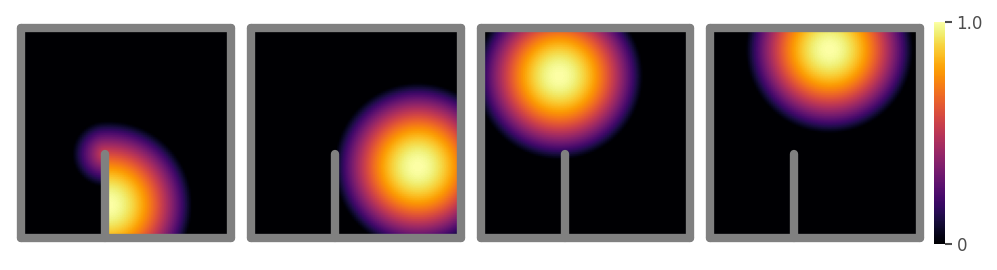

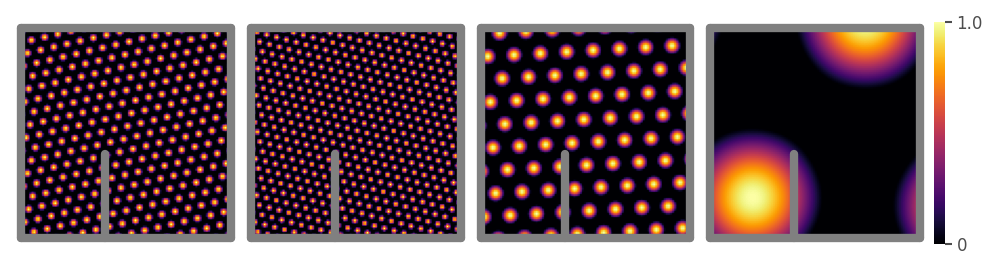

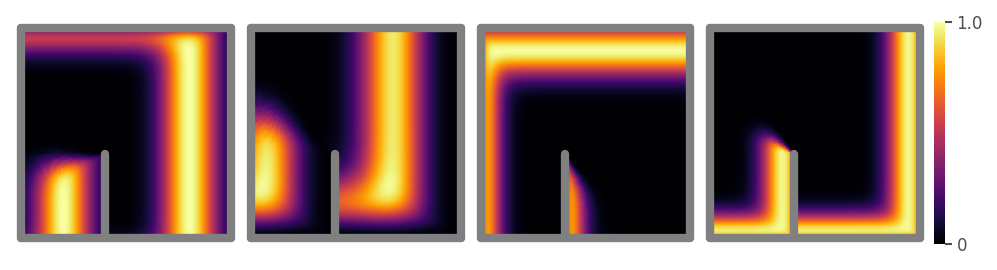

In [5]:
ratinabox.verbose = False
Env = Environment()
Env.add_wall(np.array([[0.4, 0], [0.4, 0.4]]))

Ag = Agent(Env)

PCs = PlaceCells(
    Ag,
    params={"n": 4, "description": "gaussian_threshold", "widths": 0.4, "color": "C1"},
)

GCs = GridCells(Ag, params={"n": 4, "color": "C2"})
BVCs = BoundaryVectorCells(Ag, params={"n": 4, "color": "C3"})
VCs = VelocityCells(Ag, params={"color": "C5"})

fig, ax = PCs.plot_rate_map()
fig, ax = GCs.plot_rate_map()
fig, ax = BVCs.plot_rate_map()

In [6]:
for i in tqdm(range(int(60 / Ag.dt))):
    Ag.update()
    PCs.update()
    GCs.update()
    BVCs.update()
    VCs.update()

100%|██████████| 6000/6000 [00:04<00:00, 1268.12it/s]


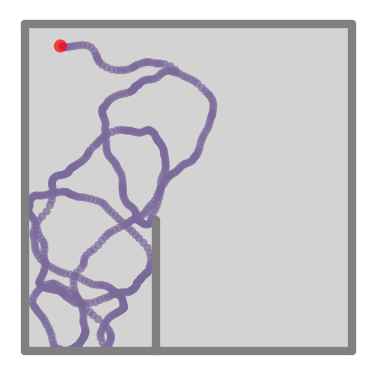

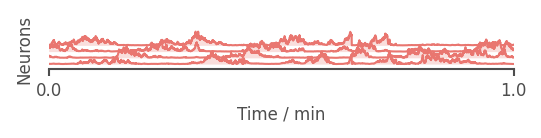

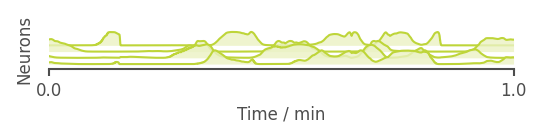

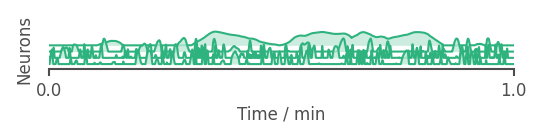

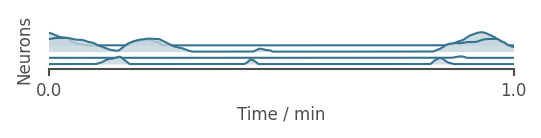

In [7]:
fig, ax = Ag.plot_trajectory()
fig, ax = VCs.plot_rate_timeseries()
fig, ax = BVCs.plot_rate_timeseries()
fig, ax = GCs.plot_rate_timeseries()
fig, ax = PCs.plot_rate_timeseries()

### Figure 1d



100%|██████████| 1000/1000 [00:01<00:00, 902.37it/s]


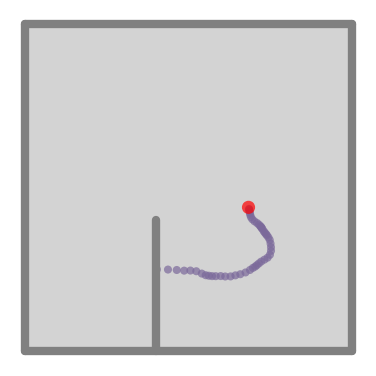

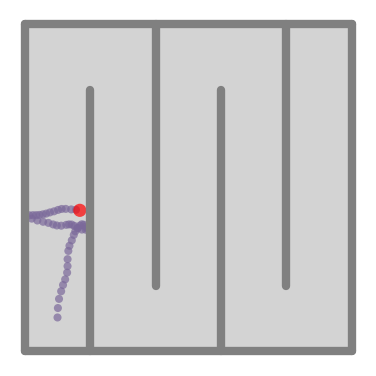

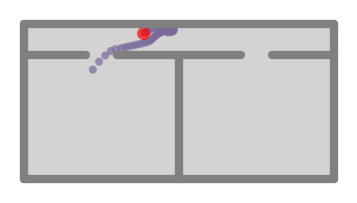

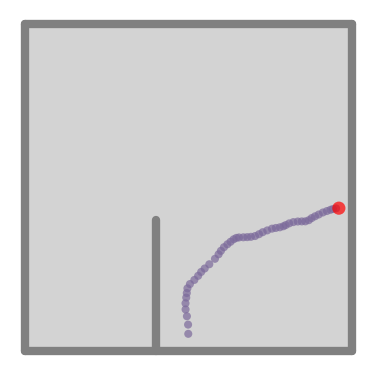

In [8]:
Env1 = Environment()
Env1.add_wall([[0, 0.5], [0.2, 0.5]])
Env1.add_wall([[0.3, 0.5], [0.7, 0.5]])
Env1.add_wall([[0.8, 0.5], [1, 0.5]])
Env1.add_wall([[0.5, 0], [0.5, 0.2]])
Env1.add_wall([[0.5, 0.3], [0.5, 0.7]])
Env1.add_wall([[0.5, 0.8], [0.5, 1]])
Ag1 = Agent(Env)
Ag1.pos = np.array([0.4, 0.25])
Ag1.velocity = 0.3 * np.array([1, 0])


Env2 = Environment()
Env2.add_wall([[0.2, 0], [0.2, 0.8]])
Env2.add_wall([[0.4, 1], [0.4, 0.2]])
Env2.add_wall([[0.6, 0], [0.6, 0.8]])
Env2.add_wall([[0.8, 1], [0.8, 0.2]])
Ag2 = Agent(Env2)
Ag2.pos = np.array([0.1, 0.1])
Ag2.velocity = 0.3 * np.array([0, 1])


Env3 = Environment(params={"aspect": 2, "scale": 0.5})
Env3.add_wall([[0.5, 0], [0.5, 0.4]])
Env3.add_wall([[0, 0.4], [0.2, 0.4]])
Env3.add_wall([[0.3, 0.4], [0.7, 0.4]])
Env3.add_wall([[0.8, 0.4], [1, 0.4]])
Ag3 = Agent(Env3)
Ag3.pos = np.array([0.22, 0.35])
Ag3.velocity = 0.3 * np.array([0.5, 1])


Env4 = Environment(params={"aspect": 2, "scale": 0.5})
Env4.add_wall([[0.1, 0.25], [0.5, 0.45]])
Env4.add_wall([[0.4, 0.3], [0.65, 0.05]])
Env4.add_wall([[0.65, 0.25], [0.9, 0.3]])

Ag4 = Agent(Env)
Ag4.pos = np.array([0.5, 0.05])
Ag4.velocity = 0.3 * np.array([0, 1])


train_time = 10
for i in tqdm(range(int(train_time / Ag1.dt))):
    Ag1.update()
    Ag2.update()
    Ag3.update()
    Ag4.update()


fig1, ax1 = Ag1.plot_trajectory(t_end=5)
fig2, ax2 = Ag2.plot_trajectory(t_end=5)
fig3, ax3 = Ag3.plot_trajectory(t_end=5)
fig4, ax4 = Ag4.plot_trajectory(t_end=5)

### Figure 1e

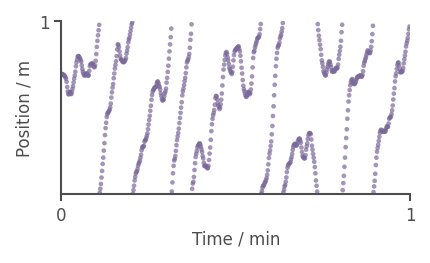

In [9]:
Env = Environment(params={"dimensionality": "1D", "boundary_conditions": "periodic"})
Ag = Agent(Env, params={"speed_mean": 0.1, "speed_std": 0.2})

for i in range(int(60 / Ag.dt)):
    Ag.update()

fig, ax = Ag.plot_trajectory()

## Figure 2

### Figure 2a
First we must import and analyze Sargolini et al 2006 locomotion data

In [14]:
from scipy import io
from scipy.optimize import curve_fit


def rayleigh(x, sigma, K):
    return K * x * np.e ** (-(x**2) / (2 * (sigma**2)))


def exponential(t, tau, K):
    return K * np.e ** (-t / tau)


def gaussian(x, sigma, K):
    return K * np.e ** (-(x**2) / (2 * (sigma**2)))


def lagged_autocorrelation(t, x, max_t=10):
    from scipy.stats import pearsonr

    R, T = [], []
    time, i = 0, 0
    while time < max_t:
        if i == 0:
            r = pearsonr(x, x)[0]
        else:
            r = pearsonr(x[i:], x[:-i])[0]
        i += 1
        T.append(t[i])
        R.append(r)
        time = t[i]
    return np.array(T), np.array(R)


# import data
mat = io.loadmat(
    "../rawdata//8F6BE356-3277-475C-87B1-C7A977632DA7_1/11084-03020501_t2c1.mat"
)
x = ((mat["x1"] + mat["x2"]) / 2).reshape(-1)
y = ((mat["y1"] + mat["y2"]) / 2).reshape(-1)
t = (mat["t"]).reshape(-1)
# remove nans
y = y[np.logical_not(np.isnan(x))]
t = t[np.logical_not(np.isnan(x))]
x = x[np.logical_not(np.isnan(x))]
# normalise and put in metres
x = (x - min(x)) / 100
y = (y - min(y)) / 100
x = x + 0.5 * (1 - max(x))
y = y + 0.5 * (1 - max(y))
# downsample (so my code will later smooth it) (currently at 50Hz --> 2.5Hz)
x = x[::20]
y = y[::20]
t = t[::20]
# concatenate
pos = np.stack((x, y)).T
# make env, pass data to agent, and then upsample
Env = Environment()
Ag_s = Agent(Env)
Ag_s.import_trajectory(times=t, positions=pos)
for i in tqdm(range(int(max(t) / Ag_s.dt))):
    Ag_s.update()

Successfully imported dataset from arrays passed
Total of 599.3 s of data available


100%|██████████| 59936/59936 [00:04<00:00, 13015.13it/s]


best Rayleigh sigma: 0.0806517598727339
best gaussian sigma: 117.65599049819903
best tau for speed is: 0.7243065130660876
best tau for rotational_vel is: 0.08711967798618774


'../../figures/11_04_23/sarg_rotac_1653'

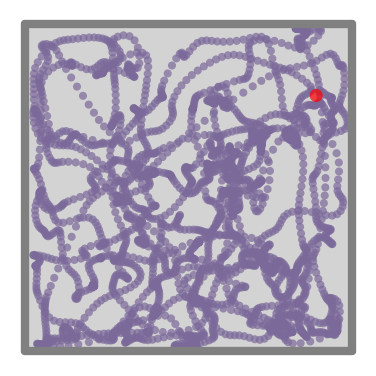

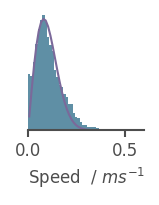

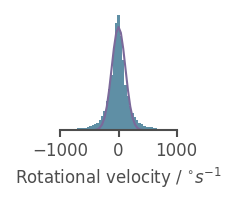

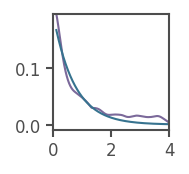

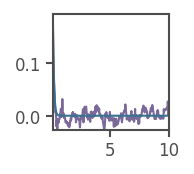

In [15]:
# plot sargolini trajectory
fig, ax = Ag_s.plot_trajectory(t_end=5 * 60)
ratinabox.utils.save_figure(fig, "sarg_trajectory")


# plot sargolini speed histogram
fig, ax, y_v, x_v, patches = Ag_s.plot_histogram_of_speeds(return_data=True)
ax.set_xlim(right=0.6)
x_v = (x_v[1:] + x_v[:-1]) / 2
sigma, K = curve_fit(rayleigh, x_v, y_v)[0]
print("best Rayleigh sigma:", sigma)
y_fit = rayleigh(x_v, sigma, K)
ax.plot(x_v, y_fit)
ratinabox.utils.save_figure(fig, "sarg_rayleigh")


# plot sargolini rotational speed histogram
fig, ax, y_v, x_v, patches = Ag_s.plot_histogram_of_rotational_velocities(
    return_data=True
)
ax.set_xlim(left=-1000, right=1000)
x_v = (x_v[1:] + x_v[:-1]) / 2
sigma, K = curve_fit(gaussian, x_v, y_v, p0=np.array([1000, 500]))[0]
print("best gaussian sigma:", sigma)
y_fit = gaussian(x_v, sigma, K)
ax.plot(x_v, y_fit)
ratinabox.utils.save_figure(fig, "sarg_normal")


t = np.array(Ag_s.history["t"])
speed = np.linalg.norm(np.array(Ag_s.history["vel"]), axis=1)
speed = (speed - np.mean(speed)) / np.std(speed)
lag, speed_autocorr = lagged_autocorrelation(t, speed)
lag = lag[10:]
speed_autocorr = speed_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag, speed_autocorr)
tau, K = curve_fit(exponential, lag, speed_autocorr)[0]
print("best tau for speed is:", tau)
y_fit = exponential(lag, tau, K)
ax.plot(lag, y_fit)
ax.set_xlim(left=0, right=4)
ratinabox.utils.save_figure(fig, "sarg_speedac")


rot_vel = np.array(Ag_s.history["rot_vel"])
rot_vel = (rot_vel - np.mean(rot_vel)) / np.std(rot_vel)
lag, rot_vel_autocorr = lagged_autocorrelation(t, rot_vel)
lag = lag[10:]
rot_vel_autocorr = rot_vel_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag, rot_vel_autocorr)
tau, K = curve_fit(exponential, lag, rot_vel_autocorr)[0]
print("best tau for rotational_vel is:", tau)
y_fit = exponential(lag, tau, K)
ax.plot(lag, y_fit)
ratinabox.utils.save_figure(fig, "sarg_rotac")

### Figure 2b 
(the `RatInABox' version of the sargolini data )

In [16]:
Env = Environment()
Ag_r = Agent(Env)
for i in tqdm(range(int(600 / Ag_r.dt))):
    Ag_r.update()

100%|██████████| 60000/60000 [00:16<00:00, 3569.12it/s]


best tau for speed is: 0.6320556886276951
best tau for rotational_vel is: 0.0703562264500574


'../../figures/11_04_23/riab_rotac_1653'

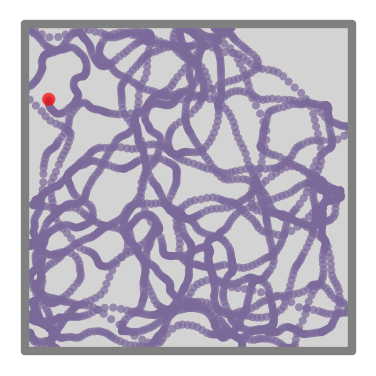

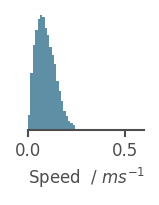

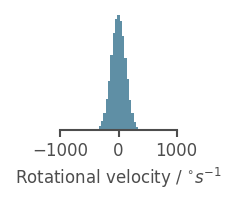

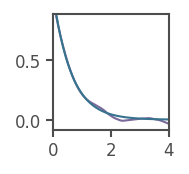

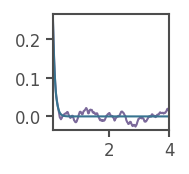

In [17]:
fig, ax = Ag_r.plot_trajectory(t_end=60 * 5)
ratinabox.utils.save_figure(fig, "riab_trajectory")

fig, ax = Ag_r.plot_histogram_of_speeds()
ax.set_xlim(0, 0.60)
ratinabox.utils.save_figure(fig, "riab_rayleigh")

fig, ax = Ag_r.plot_histogram_of_rotational_velocities()
ax.set_xlim(-1000, 1000)
ratinabox.utils.save_figure(fig, "riab_normal")

t = np.array(Ag_r.history["t"])
speed = np.linalg.norm(np.array(Ag_r.history["vel"]), axis=1)
speed = (speed - np.mean(speed)) / np.std(speed)
lag, speed_autocorr = lagged_autocorrelation(t, speed)
lag = lag[10:]
speed_autocorr = speed_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag, speed_autocorr)
tau, K = curve_fit(exponential, lag, speed_autocorr)[0]
print("best tau for speed is:", tau)
y_fit = exponential(lag, tau, K)
ax.plot(lag, y_fit)
ax.set_xlim(left=0, right=4)
ratinabox.utils.save_figure(fig, "riab_speedac")

rot_vel = np.array(Ag_r.history["rot_vel"])
rot_vel = (rot_vel - np.mean(rot_vel)) / np.std(rot_vel)
lag, rot_vel_autocorr = lagged_autocorrelation(t, rot_vel)
lag = lag[10:]
rot_vel_autocorr = rot_vel_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag, rot_vel_autocorr)
tau, K = curve_fit(exponential, lag, rot_vel_autocorr)[0]
print("best tau for rotational_vel is:", tau)
y_fit = exponential(lag, tau, K)
ax.plot(lag, y_fit)
ax.set_xlim(right=4)
ratinabox.utils.save_figure(fig, "riab_rotac")

### Figure 2c and d

In [18]:
Env = Environment()
Ag1 = Ag = Agent(
    Env,
    params={
        "thigmotaxis": 0.8,
    },
)
Ag2 = Ag = Agent(
    Env,
    params={
        "thigmotaxis": 0.2,
    },
)

Ag1.dt = 100e-3
Ag2.dt = 100e-3

for i in tqdm(range(int(90 * 60 / Ag1.dt))):
    Ag1.update()
    Ag2.update()

100%|██████████| 54000/54000 [00:30<00:00, 1781.61it/s]


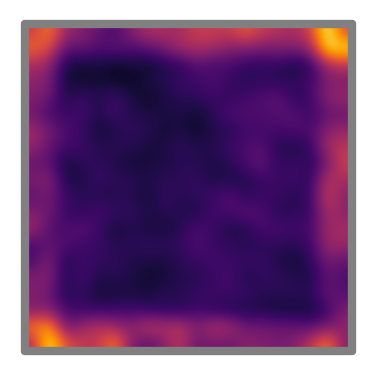

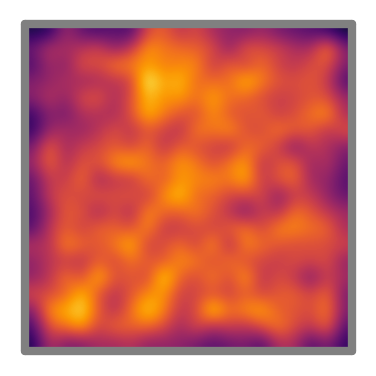

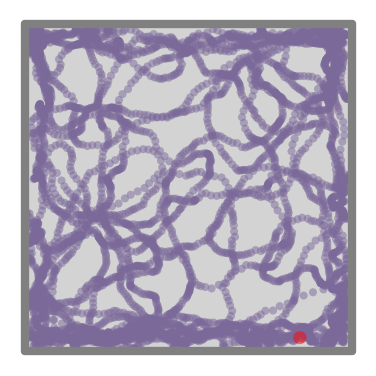

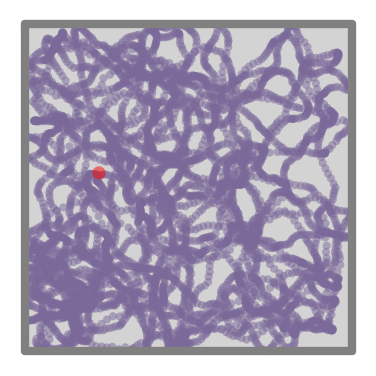

In [19]:
fig, ax = Ag1.plot_position_heatmap()
fig, ax = Ag2.plot_position_heatmap()
fig, ax = Ag1.plot_trajectory(t_end=60 * 10, alpha=0.5)
fig, ax = Ag2.plot_trajectory(t_end=60 * 10, alpha=0.5)


## Figure 3

### Figure 3a

Successfully imported dataset from arrays passed
Total of 25.0 s of data available
Successfully imported dataset from arrays passed
Total of 24.7 s of data available


100%|██████████| 2673/2673 [00:00<00:00, 9579.45it/s]


'../../figures/11_04_23/sargolini_trajectory_1654'

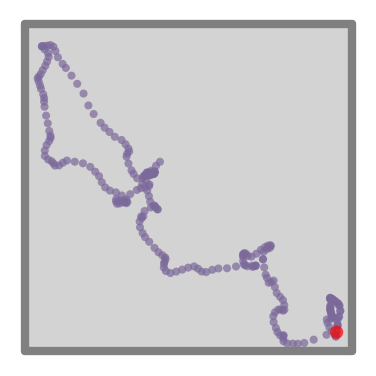

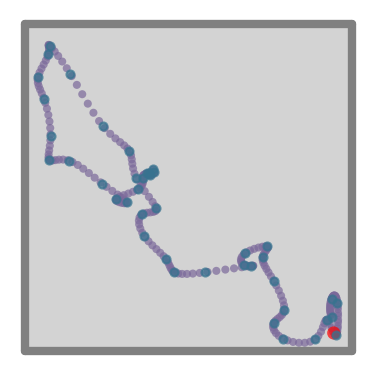

In [20]:
# import data
from scipy import io

mat = io.loadmat(
    "../rawdata//8F6BE356-3277-475C-87B1-C7A977632DA7_1/11084-03020501_t2c1.mat"
)
x = ((mat["x1"] + mat["x2"]) / 2).reshape(-1)
y = ((mat["y1"] + mat["y2"]) / 2).reshape(-1)
t = (mat["t"]).reshape(-1)
# remove nans
y = y[np.logical_not(np.isnan(x))]
t = t[np.logical_not(np.isnan(x))]
x = x[np.logical_not(np.isnan(x))]
# normalise and put in metres
x = (x - min(x)) / 100
y = (y - min(y)) / 100
x = x + 0.5 * (1 - max(x))
y = y + 0.5 * (1 - max(y))
# save_data
pos = np.stack((x, y)).T
# np.savez("../ratinabox/data/sargolini.npz",t=t,pos=pos) #(did this once but dont do it again)
# data is 10 mins, we want 10 secs
startid = np.argmin(np.abs(t - 2))  # start at 2s
endid = np.argmin(np.abs(t - 2 - 25))  # end at 27s
x = x[startid:endid]
y = y[startid:endid]
t = t[startid:endid]
# downsample (so ratinabox will later smooth it) (currently at 50Hz --> 2.5Hz)
x_ds = x[::30]
y_ds = y[::30]
t_ds = t[::30]
# concatenate
pos = np.stack((x, y)).T
pos_ds = np.stack((x_ds, y_ds)).T

Env = Environment()
Ag1 = Agent(Env)
Ag2 = Agent(Env)
Ag1.import_trajectory(times=t, positions=pos)
Ag2.import_trajectory(times=t_ds, positions=pos_ds)

for i in tqdm(range(int(t_ds[-1] / Ag2.dt))):
    Ag1.update()
    Ag2.update()

fig, ax = Ag1.plot_trajectory()
fig, ax = Ag2.plot_trajectory()
ax.scatter(x_ds, y_ds, c="C1", s=15, linewidth=1, zorder=11, alpha=0.7)
ratinabox.utils.save_figure(fig, "sargolini_trajectory")

### Figure 3b
See reinforcement learning demo script

### Figure 3c

In [21]:
Env = Environment()
# Env.add_wall(np.array([[0.25,0.5],[0.75,0.5]]))
Ag = Agent(Env)

Ntest = 1000
PCs = PlaceCells(Ag, params={"n": Ntest, "color": "C1"})
GCs = GridCells(Ag, params={"n": Ntest, "color": "C2"})
BVCs = BoundaryVectorCells(
    Ag,
    params={
        "n": Ntest,
        "color": "C3",
    },
)

In [22]:
import time

motion = []
pc = []
gc = []
bvc = []
matmul = []
inverse = []

for i in tqdm(range(100)):
    t0 = time.time()
    Ag.update()
    t1 = time.time()
    motion.append(t1 - t0)

    t0 = time.time()
    PCs.update()
    t1 = time.time()
    pc.append(t1 - t0)

    t0 = time.time()
    GCs.update()
    t1 = time.time()
    gc.append(t1 - t0)

    t0 = time.time()
    BVCs.update()
    t1 = time.time()
    bvc.append(t1 - t0)

    a = np.random.normal(size=(Ntest,))
    b = np.random.normal(size=(Ntest, Ntest))
    t0 = time.time()
    c = np.matmul(b, a)
    t1 = time.time()
    matmul.append(t1 - t0)

    a = np.random.normal(size=(Ntest, Ntest))
    t0 = time.time()
    b = np.linalg.inv(a)
    t1 = time.time()
    inverse.append(t1 - t0)

motion = np.array(motion)
pc = np.array(pc)
gc = np.array(gc)
bvc = np.array(bvc)
matmul = np.array(matmul)
inverse = np.array(inverse)

100%|██████████| 100/100 [00:10<00:00,  9.24it/s]


'../../figures/11_04_23/clocktimes_1657'

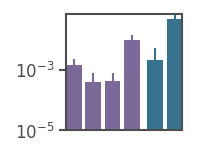

In [23]:
positions = [1, 2, 3, 4, 5.2, 6.2]
heights = [
    motion.mean(),
    pc.mean(),
    gc.mean(),
    bvc.mean(),
    matmul.mean(),
    inverse.mean(),
]
uncertainties = [
    motion.std(),
    pc.std(),
    gc.std(),
    bvc.std(),
    matmul.std(),
    inverse.std(),
]
color = ["C0", "C0", "C0", "C0", "C1", "C1"]

fig, ax = plt.subplots()
ax.bar(positions, heights, color=color, yerr=uncertainties, ecolor=color)
ax.set_yscale("log")
ax.set_ylim(bottom=1e-5)
ax.set_xticks([])
ratinabox.utils.save_figure(fig, "clocktimes")

## Supplementary figures
Other figures (e.g. the supplementaries) can be found in their own dedicated demo scripts. 